In [1]:
# https://www.youtube.com/watch?v=ikt0sny_ImY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer

In [2]:
%matplotlib inline
#rcParams['figure.figsize'] = 7, 4



In [3]:
cancer = load_breast_cancer()

X = scale(cancer.data)
y = pd.DataFrame(cancer.target)
variable_names = cancer.feature_names
X[0:2]


array([[  1.09706398e+00,  -2.07333501e+00,   1.26993369e+00,
          9.84374905e-01,   1.56846633e+00,   3.28351467e+00,
          2.65287398e+00,   2.53247522e+00,   2.21751501e+00,
          2.25574689e+00,   2.48973393e+00,  -5.65265059e-01,
          2.83303087e+00,   2.48757756e+00,  -2.14001647e-01,
          1.31686157e+00,   7.24026158e-01,   6.60819941e-01,
          1.14875667e+00,   9.07083081e-01,   1.88668963e+00,
         -1.35929347e+00,   2.30360062e+00,   2.00123749e+00,
          1.30768627e+00,   2.61666502e+00,   2.10952635e+00,
          2.29607613e+00,   2.75062224e+00,   1.93701461e+00],
       [  1.82982061e+00,  -3.53632408e-01,   1.68595471e+00,
          1.90870825e+00,  -8.26962447e-01,  -4.87071673e-01,
         -2.38458552e-02,   5.48144156e-01,   1.39236330e-03,
         -8.68652457e-01,   4.99254601e-01,  -8.76243603e-01,
          2.63326966e-01,   7.42401948e-01,  -6.05350847e-01,
         -6.92926270e-01,  -4.40780058e-01,   2.60162067e-01,
       

In [4]:
clustering = KMeans(n_clusters=2, random_state = 5)
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [5]:
cancer_df = pd.DataFrame(cancer.data)
cancer_df.columns = variable_names
#y.columns = ['Targets']

Text(0.5,1,u'KMeans Classification')

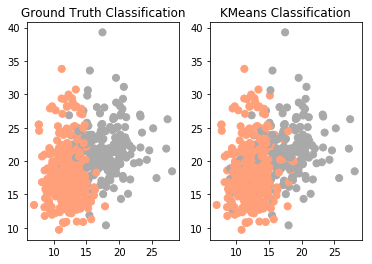

In [6]:
color_theme = np.array(['darkgray', 'lightsalmon'])

plt.subplot(1,2,1)
plt.scatter(x=cancer_df['mean radius'], y= cancer_df['mean texture'], c=color_theme[cancer.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=cancer_df['mean radius'], y= cancer_df['mean texture'], c=color_theme[clustering.labels_], s=50)
plt.title('KMeans Classification')

Text(0.5,1,u'KMeans Classification')

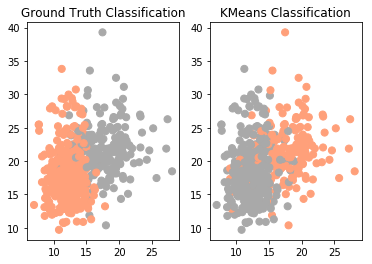

In [7]:
relabel = np.choose(clustering.labels_,[1,0]).astype(np.int64)
plt.subplot(1,2,1)
plt.scatter(x=cancer_df['mean radius'], y= cancer_df['mean texture'], c=color_theme[cancer.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=cancer_df['mean radius'], y= cancer_df['mean texture'], c=color_theme[relabel], s=50)
plt.title('KMeans Classification')

In [15]:
print classification_report(y,clustering.labels_)
#print classification_report(y,relabel)

             precision    recall  f1-score   support

          0       0.93      0.83      0.87       212
          1       0.90      0.96      0.93       357

avg / total       0.91      0.91      0.91       569



In [16]:
print "ARI: ", sklearn.metrics.adjusted_rand_score(y.values.flatten(),clustering.labels_)

ARI:  0.670720647688


In [17]:
y.shape

(569, 1)

In [18]:
clustering.labels_.shape

(569L,)

In [19]:
#https://archive.ics.uci.edu/ml/datasets/Image+Segmentation

###########  image segmentation  ########

In [20]:
image = pd.read_csv('C:/Users/443966/github/7641_ML/A3 - Unsupervised Learning and Dimensionality Reduction/datasets/image_segmentation_1.csv')


X = image[image.columns.difference(['CLASS'])]
y = image['CLASS']
X[0:2]

#X = scale(cancer.data)
#y = pd.DataFrame(cancer.target)
variable_names = list(image.columns.values)
print 
print variable_names

clustering = KMeans(n_clusters=7, random_state = 5)
clustering.fit(X)


image_df = pd.DataFrame(image)
image_df.columns = variable_names
#y.columns = ['Targets']

image_target=image.CLASS.values
image_target = image_target -1




['CLASS', 'REGION-CENTROID-COL', 'REGION-CENTROID-ROW', 'REGION-PIXEL-COUNT', 'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN', 'VEDGE-SD', 'HEDGE-MEAN', 'HEDGE-SD', 'INTENSITY-MEAN', 'RAWRED-MEAN', 'RAWBLUE-MEAN', 'RAWGREEN-MEAN', 'EXRED-MEAN', 'EXBLUE-MEAN', 'EXGREEN-MEAN', 'VALUE-MEAN', 'SATURATION-MEAN', 'HUE-MEAN']


Text(0.5,1,u'KMeans Classification')

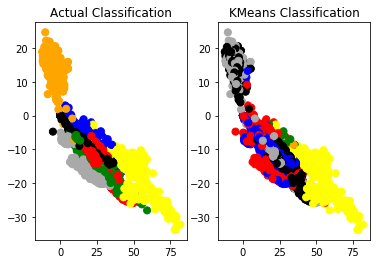

In [21]:
color_theme = np.array(['darkgray', 'yellow', 'blue', 'green', 'black', 'red', 'orange'])

plt.subplot(1,2,1)
plt.scatter(x=image_df['EXBLUE-MEAN'], y= image_df['EXGREEN-MEAN'], c=color_theme[image_target], s=50)
plt.title('Actual Classification')

plt.subplot(1,2,2)
plt.scatter(x=image_df['EXBLUE-MEAN'], y= image_df['EXGREEN-MEAN'], c=color_theme[clustering.labels_], s=50)
plt.title('KMeans Classification')

#print classification_report(y,clustering.labels_)

In [22]:
relabel = np.choose(clustering.labels_,[6,1,4,0,5,2,3]).astype(np.int64)
#relabel = np.choose(clustering.labels_,[3,3,3,5,3,3,3]).astype(np.int64)
# 4 = black
# 5 = red
# 3 = green
# 0 = salmon
# 1 = yellow
# 2 = blue
# 6 = orange

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.00      0.00      0.00       330
          2       0.00      0.00      0.00       330
          3       1.00      0.01      0.02       330
          4       0.20      0.32      0.24       330
          5       0.00      0.01      0.01       330
          6       0.41      0.40      0.41       330
          7       0.00      0.00      0.00       330

avg / total       0.23      0.10      0.10      2310



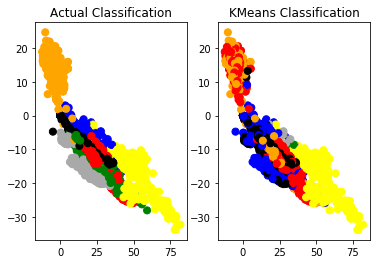

In [23]:
plt.subplot(1,2,1)
plt.scatter(x=image_df['EXBLUE-MEAN'], y= image_df['EXGREEN-MEAN'], c=color_theme[image_target], s=50)
plt.title('Actual Classification')

plt.subplot(1,2,2)
plt.scatter(x=image_df['EXBLUE-MEAN'], y= image_df['EXGREEN-MEAN'], c=color_theme[relabel], s=50)
plt.title('KMeans Classification')

print classification_report(y,relabel)

In [24]:
confusion_matrix(y,relabel)

array([[  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 233,   0,  97,   0,   0,   0],
       [  0, 330,   0,   0,   0,   0,   0,   0],
       [ 12,   0, 240,   4,  74,   0,   0,   0],
       [  2,  23, 111,   0, 104,  77,  13,   0],
       [  0,   0,  86,   0, 242,   2,   0,   0],
       [  0,   0,   0,   0,   0, 198, 132,   0],
       [  0,   0,   1,   0,   5, 148, 176,   0]], dtype=int64)

In [25]:
print "ARI: ", sklearn.metrics.adjusted_rand_score(y.values.flatten(),clustering.labels_)

ARI:  0.354695905768
